**BIG MART SALES ANALYSIS (AHMAD KHAN)**

**IMPORTING THE LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet

**IMPORTING THE DATASET**

In [ ]:
train_data = pd.read_csv("/content/Train.csv")
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test_data = pd.read_csv("/content/Test.csv")
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**DATA PREPROCESSING**

In [ ]:
data = pd.concat([train_data, test_data], ignore_index=True)

In [ ]:
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [ ]:
data.isnull().sum().sort_values(ascending=False)

Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**HANDLING MISSING VALUES**

In [ ]:
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]))

<ipython-input-10-4aac18ce122f>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]))


In [ ]:
outlet_size_mode

Outlet_Type,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Medium,Medium


In [ ]:
missing_values = data['Outlet_Size'].isnull()

Text(0.5, 1.0, 'Item Weight Distribution')

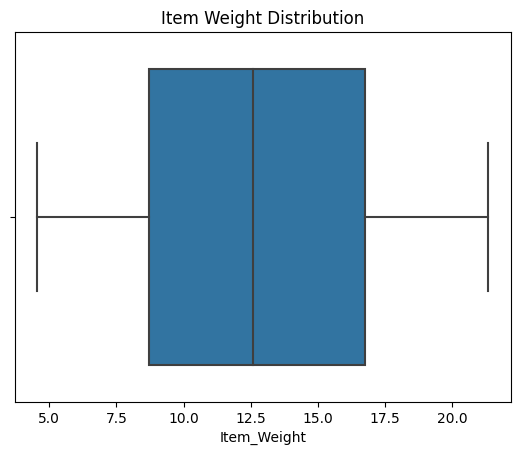

In [ ]:
sns.boxplot(x=data['Item_Weight'])
plt.title('Item Weight Distribution')

In [ ]:
data['Item_Weight'].mean()

12.792854228644284

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

Text(0.5, 1.0, 'Item Outlet Sales Distribution')

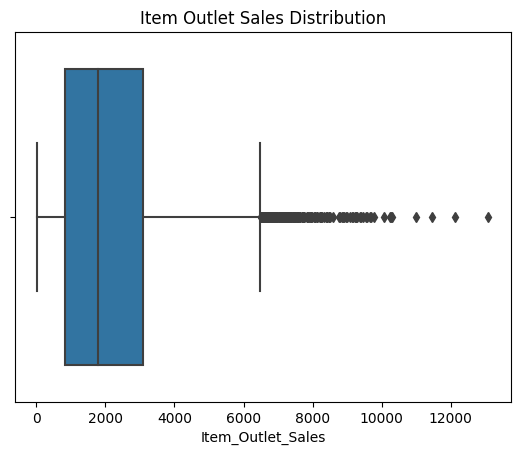

In [ ]:
sns.boxplot(x=data['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution')

**REMOVING OUTLIERS**

In [ ]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
data = data[(data['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]

Upper whisker:  6278.8269
Lower Whisker:  -2469.7851000000005


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

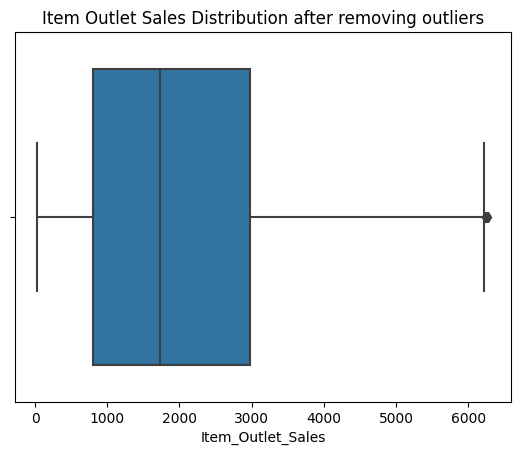

In [ ]:
sns.boxplot(x=data['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution after removing outliers')

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2375
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8298.000000,8298.000000,8298.000000,8298.000000,8298.000000
mean,12.843483,0.066361,138.795191,1997.969511,2039.014345
std,4.252239,0.051875,61.419553,8.307438,1480.018622
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027000,92.786350,1987.000000,808.947000
50%,12.792854,0.053864,140.749600,1999.000000,1737.072200
75%,16.100000,0.095358,183.162750,2004.000000,2976.126000
max,21.350000,0.328391,266.888400,2009.000000,6275.165000


In [ ]:
sns.set()

<ipython-input-25-40658f755ce3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Item_Weight"])


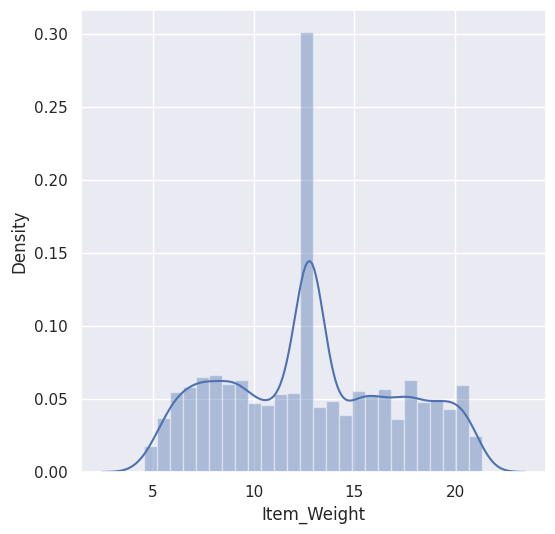

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(data["Item_Weight"])
plt.show()

<ipython-input-26-528e18b108bb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Item_Visibility"])


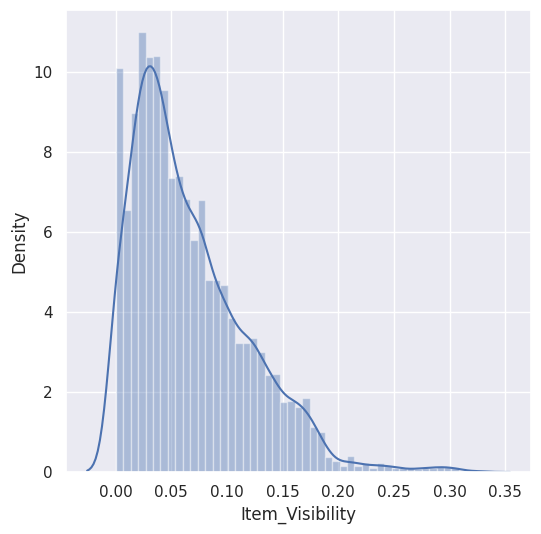

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(data["Item_Visibility"])
plt.show()

<Axes: xlabel='Item_Visibility'>

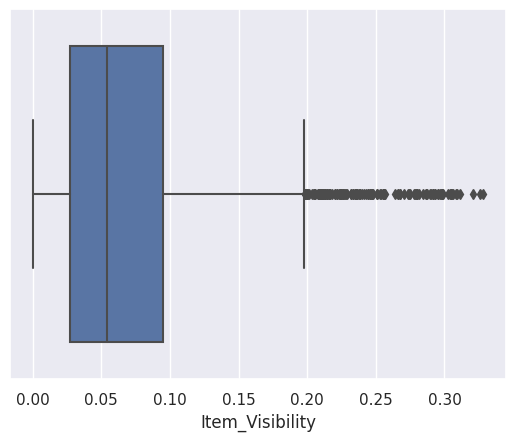

In [ ]:
sns.boxplot(x=data['Item_Visibility'])

In [ ]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Visibility")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
data = data[(data['Item_Visibility'] > lower) & (data['Item_Visibility'] < upper)]

Upper whisker:  0.19789452175
Lower Whisker:  -0.07553645425


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

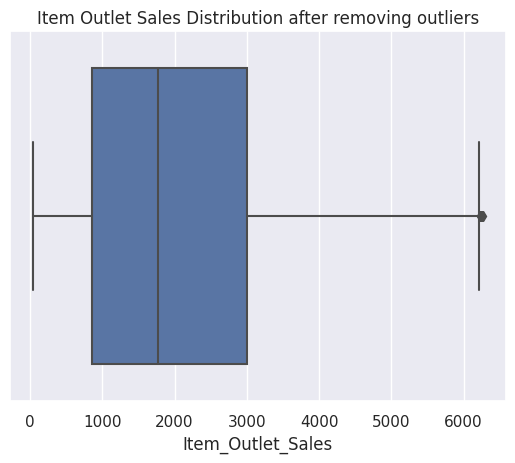

In [ ]:
sns.boxplot(x=data['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution after removing outliers')

<ipython-input-30-73f9883fa39d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Item_MRP"])


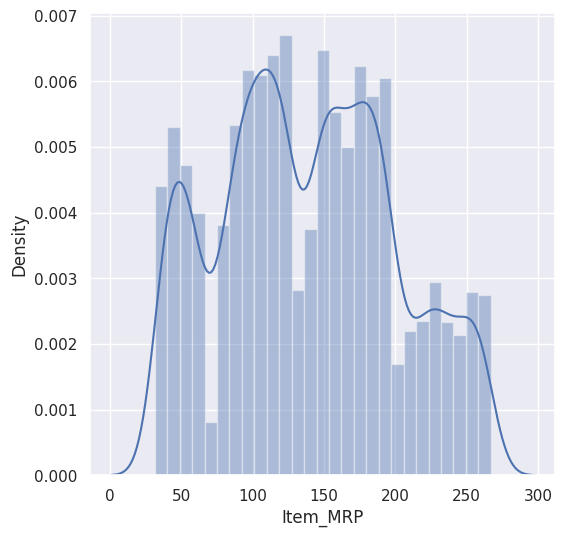

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(data["Item_MRP"])
plt.show()

<ipython-input-31-7aefe55ffdde>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Outlet_Establishment_Year"])


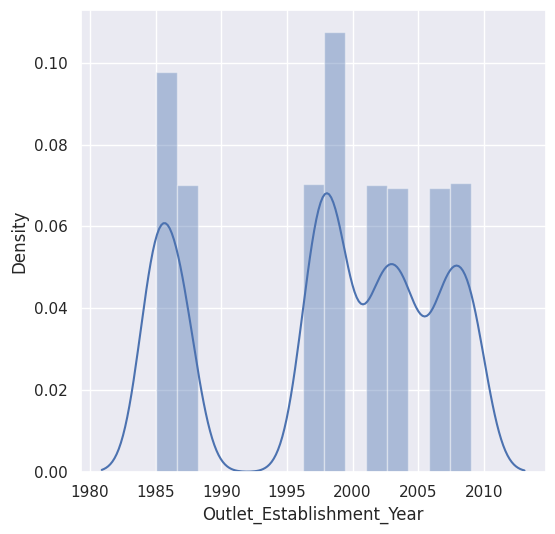

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(data["Outlet_Establishment_Year"])
plt.show()

<ipython-input-32-aebe4db6c985>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Item_Outlet_Sales"])


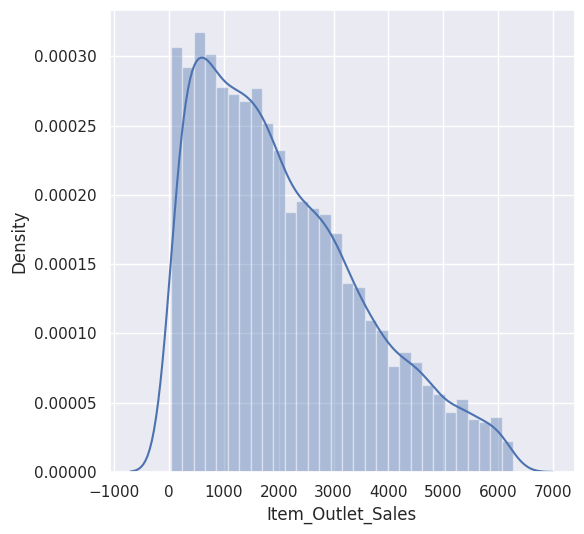

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(data["Item_Outlet_Sales"])
plt.show()

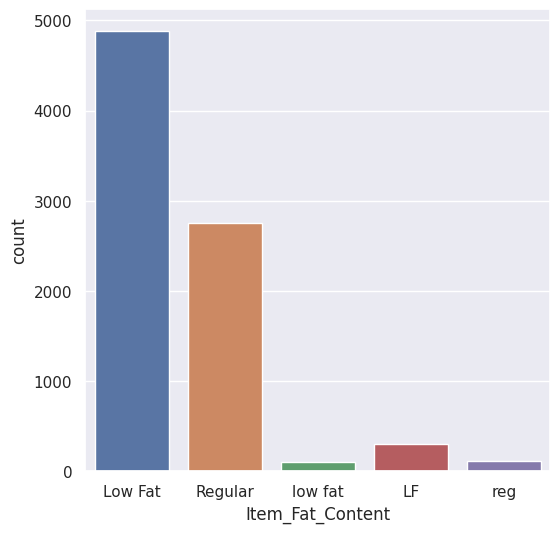

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content", data=data)
plt.show()

In [ ]:
data["Item_Fat_Content"].value_counts()

Low Fat    4880
Regular    2754
LF          303
reg         115
low fat     106
Name: Item_Fat_Content, dtype: int64

In [ ]:
data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace=True)
data["Item_Fat_Content"].value_counts()

Low Fat    5289
Regular    2869
Name: Item_Fat_Content, dtype: int64

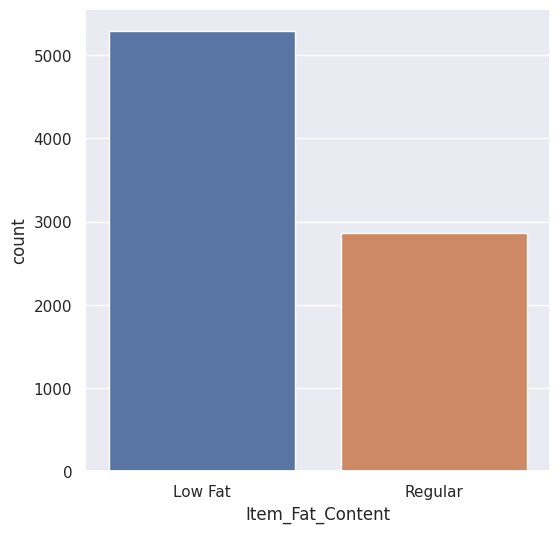

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content", data=data)
plt.show()

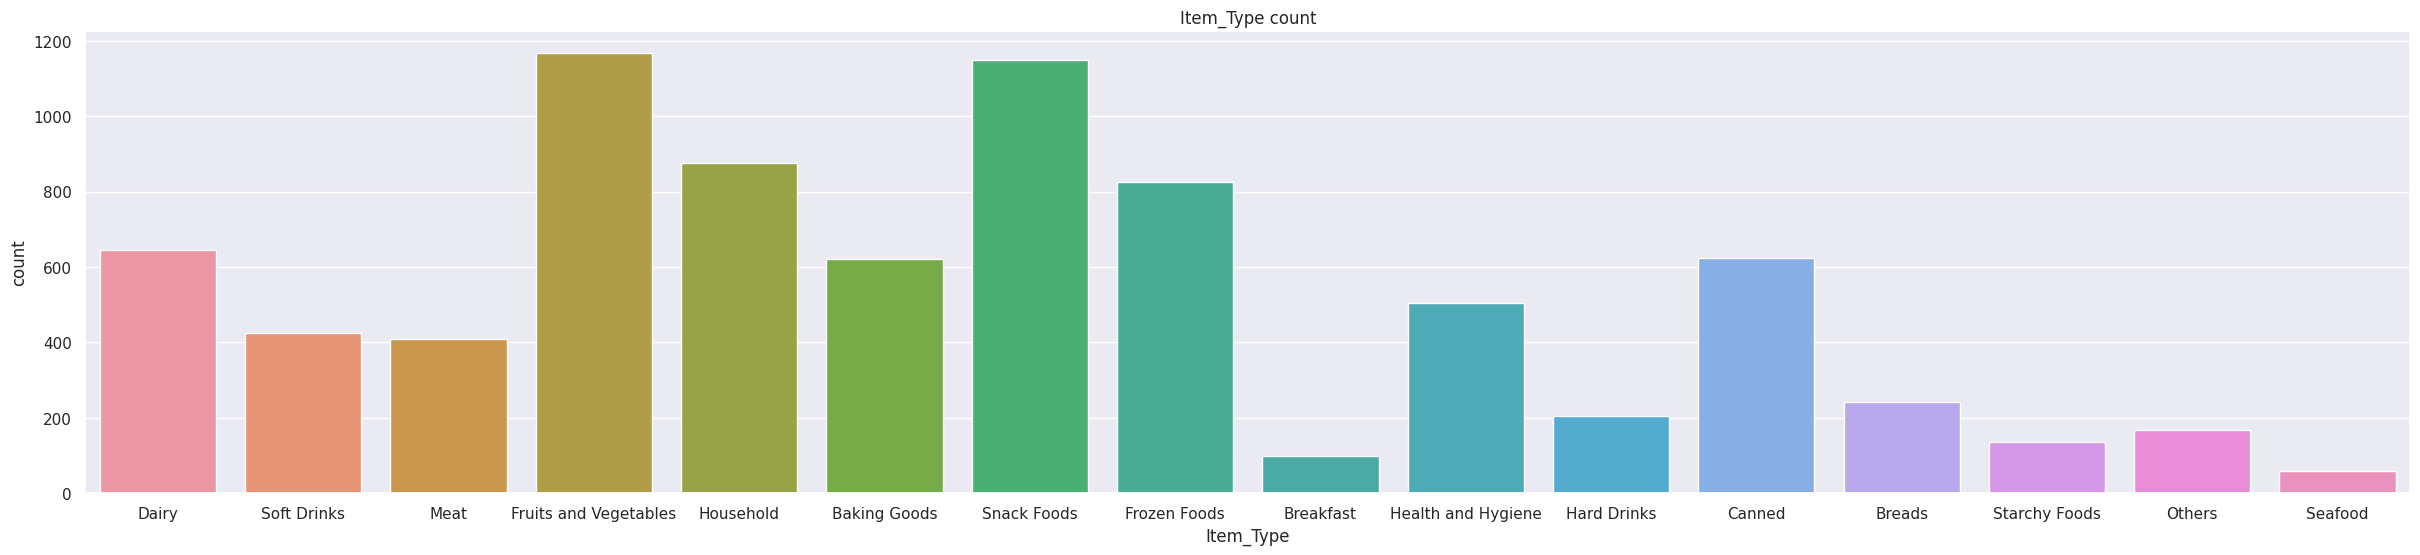

In [ ]:
plt.figure(figsize=(30,6)) # increasing size of x-axis since the values in that axis were conjusted
sns.countplot(x="Item_Type", data=data)
plt.title("Item_Type count")
plt.show()

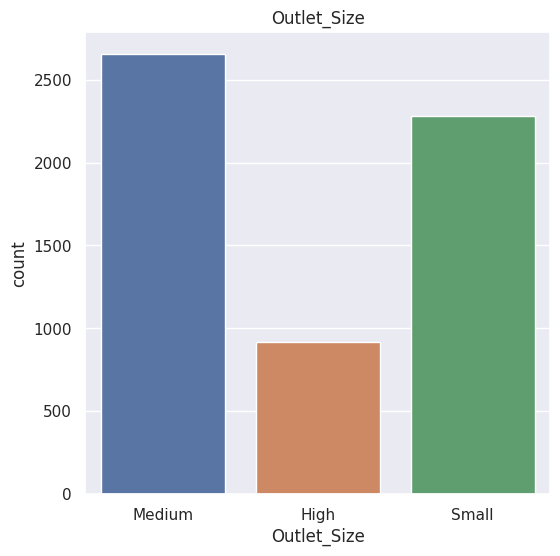

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Size", data=data)
plt.title("Outlet_Size")
plt.show()

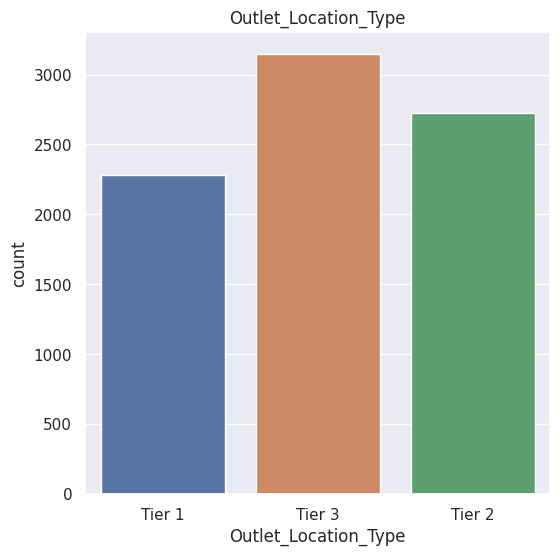

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Location_Type", data=data)
plt.title("Outlet_Location_Type")
plt.show()

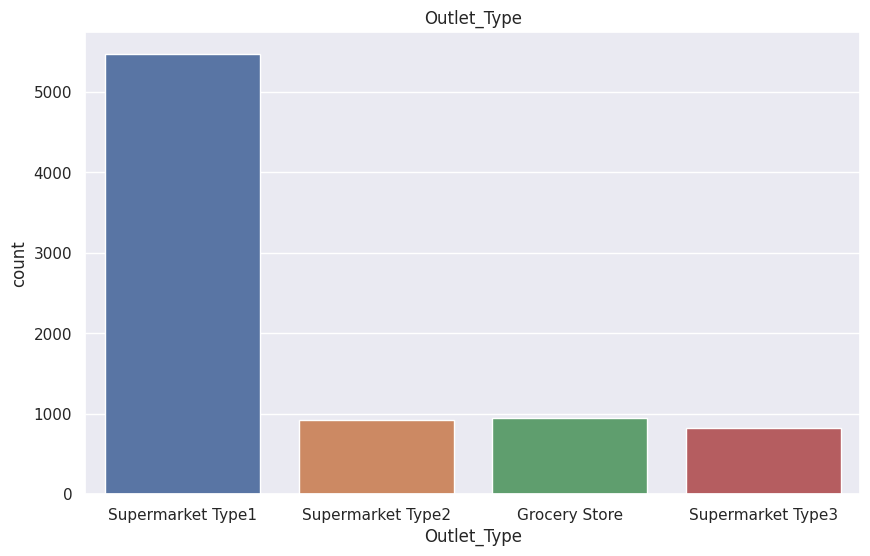

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Outlet_Type", data=data)
plt.title("Outlet_Type")
plt.show()

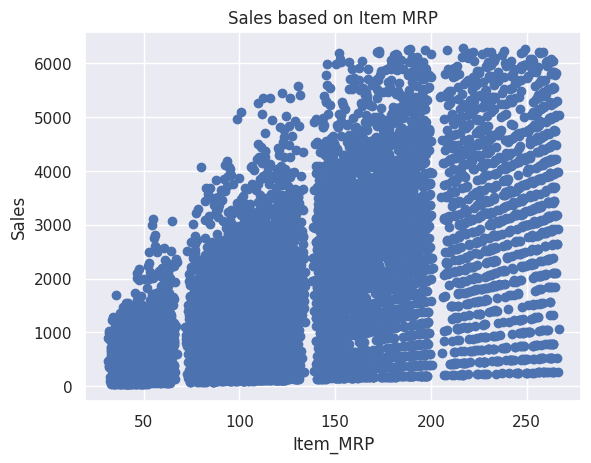

In [ ]:
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Sales')
plt.show()

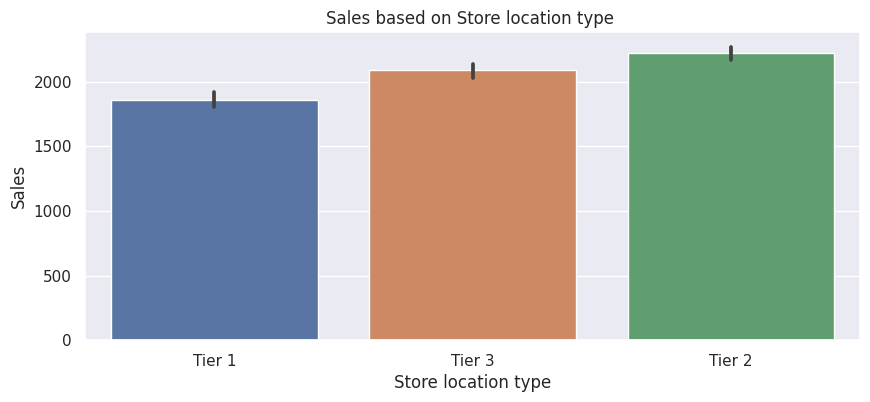

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.show()

**CONVERTING INTO NUMERICAL FORMAT**

In [ ]:
encoder = LabelEncoder()

In [ ]:
data["Item_Identifier"] = encoder.fit_transform(data['Item_Identifier'])
data["Item_Fat_Content"] = encoder.fit_transform(data['Item_Fat_Content'])
data["Item_Type"] = encoder.fit_transform(data['Item_Type'])
data["Outlet_Identifier"] = encoder.fit_transform(data['Outlet_Identifier'])
data["Outlet_Size"] = encoder.fit_transform(data['Outlet_Size'])
data["Outlet_Location_Type"] = encoder.fit_transform(data['Outlet_Location_Type'])
data["Outlet_Type"] = encoder.fit_transform(data['Outlet_Type'])

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


**CONVERTING DATA INTO TRAINING AND TESTING**

In [ ]:
X = data.drop(columns="Item_Outlet_Sales" , axis=1)
Y = data["Item_Outlet_Sales"]

In [ ]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [ ]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8158, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8158, 11) (6526, 11) (1632, 11)


In [ ]:
X.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000
mean,780.478671,12.852782,0.351679,0.063275,7.230203,138.724252,4.757906,1998.088502,1.733391,1.105786,1.198701
std,450.127632,4.269138,0.477524,0.046382,4.205341,61.395237,2.847238,8.284760,0.993119,0.809084,0.769412
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,395.000000,9.300000,0.000000,0.026815,4.000000,92.714600,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,784.000000,12.792854,0.000000,0.052700,6.000000,140.599600,5.000000,1999.000000,2.000000,1.000000,1.000000
75%,1168.000000,16.100000,1.000000,0.092932,10.000000,182.986450,7.000000,2004.000000,3.000000,2.000000,1.000000
max,1558.000000,21.350000,1.000000,0.197809,15.000000,266.888400,9.000000,2009.000000,3.000000,2.000000,3.000000


In [ ]:
sc= StandardScaler()

In [ ]:
X_train_std= sc.fit_transform(X_train)

In [ ]:
X_test_std= sc.transform(X_test)

In [ ]:
X_train_std

array([[ 0.22059773, -0.87747918, -0.74368674, ...,  0.26705967,
        -0.12515604, -0.25480459],
       [-0.18721171, -0.40955999,  1.34465219, ..., -0.74210734,
         1.11237171,  1.05144425],
       [-1.10534006, -1.06464685, -0.74368674, ..., -0.74210734,
        -1.36268379, -0.25480459],
       ...,
       [ 0.1960846 ,  0.38590263,  1.34465219, ..., -0.74210734,
        -1.36268379, -0.25480459],
       [ 1.33705964, -1.27755008, -0.74368674, ...,  0.26705967,
        -0.12515604, -0.25480459],
       [ 1.38831438,  0.38590263, -0.74368674, ..., -1.75127435,
         1.11237171, -0.25480459]])

**PERFORMING ML MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [ ]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [ ]:
pred_lr=lr.predict(X_test_std)

In [ ]:
r2_lr = r2_score(Y_test,pred_lr)
r2_lr

0.48519118193012223

In [ ]:
lr.score(X_test_std,Y_test)

0.48519118193012223

In [ ]:
lr.score(X_train_std,Y_train)

0.47353061432958876

In [ ]:
print("R Squared Value : ",(r2_lr))
print("MAE Value : ",mean_absolute_error(Y_test,pred_lr))
print("MSE Value : ",np.sqrt(mean_squared_error(Y_test,pred_lr)))

R Squared Value :  0.48519118193012223
MAE Value :  828.3782102421044
MSE Value :  1068.4419340273434


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [ ]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor()

In [ ]:
pred_rf= rf.predict(X_test_std)

In [ ]:
r2_rf = r2_score(Y_test,pred_rf)

In [ ]:
print("R Squared Value : ", r2_rf)
print("MAE Value : ",mean_absolute_error(Y_test,pred_rf))
print("MSE Value : ",np.sqrt(mean_squared_error(Y_test,pred_rf)))

R Squared Value :  0.5397985433126308
MAE Value :  724.1590875355391
MSE Value :  1010.1873613873629
